#      DB SCAN ALGORITHM ON SUICIDE DATA

In [116]:
import pandas as pd
import numpy as np
import pandas as pd# visualization
import matplotlib.pyplot as plt# algorithm
from sklearn.cluster import DBSCAN

In [117]:
raw_data = pd.read_csv('data/suicide_output.csv')
raw_data.head()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,...,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code,mobilesubscription
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,ARG,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,8.841667e+10,3264,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,ARG,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,8.841667e+10,3264,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,ARG,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,8.841667e+10,3264,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,ARG,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,8.841667e+10,3264,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,ARG,0.0


In [118]:
df = raw_data

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13276 entries, 0 to 13275
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               13276 non-null  object 
 1   year                  13276 non-null  int64  
 2   sex                   13276 non-null  object 
 3   age                   13276 non-null  object 
 4   suicides              13276 non-null  int64  
 5   population            13276 non-null  int64  
 6   sucid_in_hundredk     13276 non-null  float64
 7   country-year          13276 non-null  object 
 8   yearly_gdp            13276 non-null  float64
 9   gdp_per_capita        13276 non-null  int64  
 10  generation            13276 non-null  object 
 11  suicide%              13276 non-null  float64
 12  internetusers         13276 non-null  float64
 13  expenses              13276 non-null  float64
 14  employeecompensation  13276 non-null  float64
 15  unemployment       

In [120]:
df.isna().sum()

country                 0
year                    0
sex                     0
age                     0
suicides                0
population              0
sucid_in_hundredk       0
country-year            0
yearly_gdp              0
gdp_per_capita          0
generation              0
suicide%                0
internetusers           0
expenses                0
employeecompensation    0
unemployment            0
physician_price         0
laborforcetotal         0
lifeexpectancy          0
mobilesubscriptions     0
refugees                0
selfemployed            0
electricityacess        0
continent               0
country_code            0
mobilesubscription      0
dtype: int64

In [121]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code',
       'mobilesubscription'],
      dtype='object')

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [123]:
X_train = df[['suicides', 'unemployment','gdp_per_capita']]

In [124]:
# number of objects in a cluster is given as twenty five as per the data

clustering = DBSCAN(eps=1000, min_samples=25).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

In [125]:
clusters_suicides = DBSCAN_dataset.Cluster.value_counts().to_frame()
clusters_suicides = clusters_suicides.reset_index()
clusters_suicides

,index,Cluster
0,0,12435
1,-1,435
2,1,322
3,2,48
4,3,36


c:\Users\Sujil Kumar K.M\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Sujil Kumar K.M\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


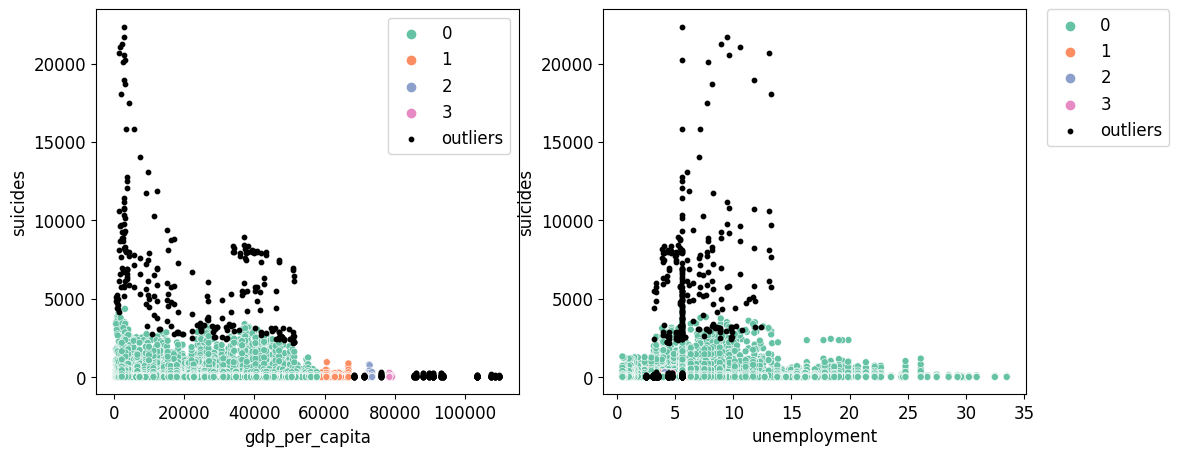

In [128]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig1, (axes) = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot('gdp_per_capita', 'suicides',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=25)

sns.scatterplot('unemployment', 'suicides',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=25)
axes[0].scatter(outliers['gdp_per_capita'], outliers['suicides'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['unemployment'], outliers['suicides'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()